In [24]:
# Let's do this with numpy and matplotlib instead of root
import numpy as np
import matplotlib.pyplot as plt

# Acceptance-Rejection Method

We will explore the acceptance-rejection method for transforming a uniform PDF to a semi-arbitrary form.
We'll demonstrate this with three examples:

1-- $f(x) = 3/8(1+x^2)$

2-- $f(x) = x^3 -1/2x^4$

3-- $f(x) = \left|\sin(x)/x\right| \times \sqrt{x}$

In [25]:
# We are going to first generate random numbers uniform in [0,1).
# Then we will transform these random values so that their PDF takes a new form.

# Random number generator
rng = np.random.default_rng()

# 1E6 random values
randUniform = rng.uniform(size=1000000)

# We are also going to need another 1E6 random values for the rejection factors
randRejection = rng.uniform(size=1000000)


## Function: $f(x) = 3/8(1+x^2)$

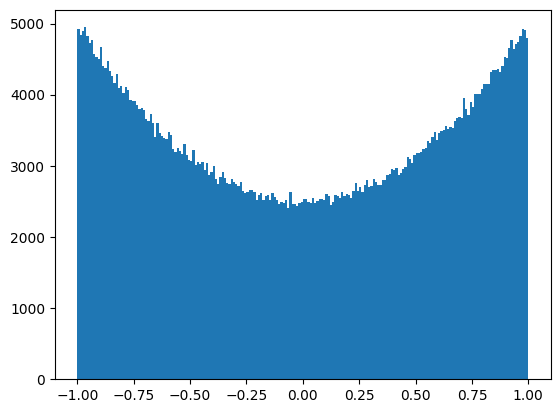

In [14]:
# Let's do a first example for an x*x distribution

r1 = -1 + 2.0*randUniform  # convert to [-1,1)
r2 = randRejection*6/8.0 # normalize to maximum value of f(1) = 3/8(1+1)
fx = 3/8.0 * (1+r1*r1)

accept = []
for i in range(len(randUniform)):
    if r2[i]<fx[i]:
        accept.append(r1[i])
        
plt.hist(accept,200)
plt.show()

## Function: $f(x) = x^3 - 1/2x^4$

#### Here we should note that the region near zero will be sparsely populated (the function needs to go to zero as $x\rightarrow 0$). In addition, there is a second root near x=2.  Thus, we will break the PDF up into two regions: [0,1) and [1,2).  This will allow us to properly populate the lower x region.

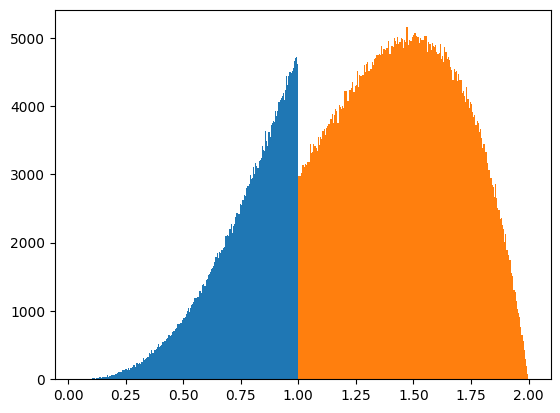

In [17]:
#Uniform distributions over [0,2)
r1 = randUniform
r2 = 1+randUniform

#Evaluate the function...
fx1 = r1*r1*r1 - 0.5*r1*r1*r1*r1
fx2 = r2*r2*r2 - 0.5*r2*r2*r2*r2

#Rejection factors
r31 = randRejection * 0.5 #Scaled to maximum in [0,1)
r32 = randRejection * 0.84375 #Scaled to maximum in [1,2)

accept1 = []
for i in range(len(randUniform)):
    if r31[i]<fx1[i]:
        accept1.append(r1[i])

accept2 = []
for i in range(len(randUniform)):
    if r32[i]<fx2[i]:
        accept2.append(r2[i])

plt.hist(accept1,200)
plt.hist(accept2,200)
plt.show()

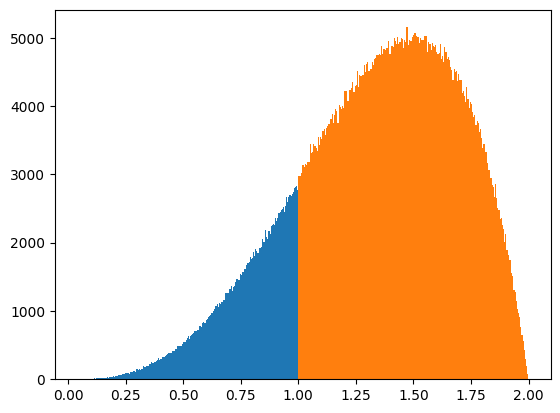

In [18]:
# Oops!  What happened?  The function should be continuous...
#
# We populated each region with the same number of entries, but the integrals of the regions are not the same.
# We can fix that by weighting the [0,1) entries by the ratio of the integrals.

weights = np.ones(len(accept1))*0.6
plt.hist(accept1,200,weights=weights)
plt.hist(accept2,200)
plt.show()

## Function: $f(x) = \left|\sin(x)/x\right| \times \sqrt{x}$

#### We'll create the PDF over the range [1E-9,15), cutting off above zero for hopefully obvious reasons.  Again, we'll split up the region over [1E-9,6) and [6,15).  The latter region will need to be seprated out to ensure sufficient statistics, just like last time.

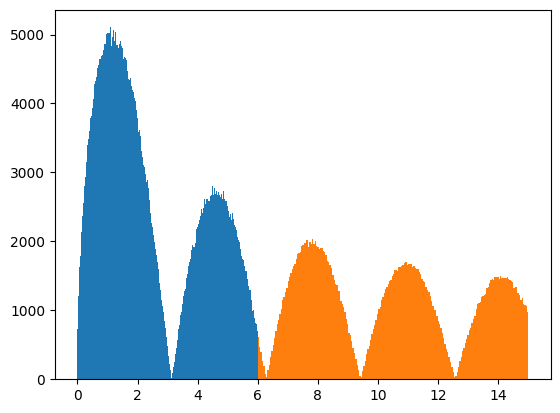

In [29]:
#Uniform distributions over [0,2)
r1 = randUniform*6+1E-9
r2 = 6+1E-9+randUniform*9  

#Evaluate the function...
fx1 = np.fabs(np.sin(r1)/r1)*np.sqrt(r1)
fx2 = np.fabs(np.sin(r2)/r2)*np.sqrt(r2)

#Rejection factors
r31 = randRejection * 0.852 #Scaled to maximum in [0,6)
r32 = randRejection * 0.358 #Scaled to maximum in [6,15)

accept1 = []
for i in range(len(randUniform)):
    if r31[i]<fx1[i]:
        accept1.append(r1[i])

accept2 = []
for i in range(len(randUniform)):
    if r32[i]<fx2[i]:
        accept2.append(r2[i])

weights = np.ones(len(accept2))*1.807/(1.807 + 2.702) # Weight by region ratio
plt.hist(accept1,200)
plt.hist(accept2,200,weights=weights)
plt.show()